In [173]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

from scipy.io import loadmat

import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
#from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



In [174]:
#scientific colormaps
#import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib.colors import LinearSegmentedColormap
#cm_data = np.loadtxt("C:/Users/gentemann/Google Drive/d_drive/ScientificColourMaps6/vik/vik.txt")
#vik_map = LinearSegmentedColormap.from_list("vik", cm_data)
#cm_data = np.loadtxt("C:/Users/gentemann/Google Drive/d_drive/ScientificColourMaps6/roma/roma.txt")
#roma_map = LinearSegmentedColormap.from_list("roma", cm_data)
#roma_map2 = LinearSegmentedColormap.from_list("roma", cm_data[-1::-1])

# Figure 1

In [179]:
#where to find the data
#adir= 'F:/data/fluxsat/WS_SST_Correlation/'
adir_data= './data/'
adir_figs= './figures/'

#read in the data
ds1=xr.open_dataset(adir_data+'Corr_High_ann.nc')
ds1.close()
ds2=xr.open_dataset(adir_data+'Corr_FF_ann.nc') #Full: corelation using unfiltered daily data: 
ds2.close()

#note - the lat axis ins't sorted in the files so I use .sortby to correct it
#note - the lon axis is wrong, stated 0-360 but actually 180, so correct it in a kludgy manner
#note - the mask was also mis-aligned in lon, so corrected that too

ds1_jdf=xr.open_dataset(adir_data+'Corr_High_DJF.nc')
ds1_jdf.close()
ds1_jja=xr.open_dataset(adir_data+'Corr_High_JJA.nc')
ds1_jja.close()
ds1_winter = xr.concat([ds1_jdf.sel(lat=slice(0,90)),ds1_jja.sel(lat=slice(-90,0))],dim='lat').sortby('lat')
#lat lon not set right
xlon=np.arange(-179.875,179.876,.25)
ds1_winter.coords['lon']=xlon
ds1_winter.coords['lon'] = np.mod(ds1_winter['lon'], 360)
ds1_winter = ds1_winter.sortby(ds1_winter.lon)
tem = np.concatenate([ds1_winter.mask.sel(lon=slice(180,361)).data,ds1_winter.mask.sel(lon=slice(0,180)).data],axis=1)
ds1_winter['mask']=xr.DataArray(tem,coords={'lat':ds1_winter.lat,'lon':ds1_winter.lon},dims=('lat','lon'))

ds2_jdf=xr.open_dataset(adir_data+'Corr_FF_DJF.nc')
ds2_jdf.close()
ds2_jja=xr.open_dataset(adir_data+'Corr_FF_JJA.nc')
ds2_jja.close()
ds2_winter = xr.concat([ds2_jdf.sel(lat=slice(0,90)),ds2_jja.sel(lat=slice(-90,0))],dim='lat').sortby('lat')
#lat lon not set right
xlon=np.arange(-179.875,179.876,.25)
ds2_winter.coords['lon']=xlon
ds2_winter.coords['lon'] = np.mod(ds2_winter['lon'], 360)
ds2_winter = ds2_winter.sortby(ds2_winter.lon)
tem = np.concatenate([ds2_winter.mask.sel(lon=slice(180,361)).data,ds2_winter.mask.sel(lon=slice(0,180)).data],axis=1)
ds2_winter['mask']=xr.DataArray(tem,coords={'lat':ds2_winter.lat,'lon':ds2_winter.lon},dims=('lat','lon'))

ds1_jdf=xr.open_dataset(adir_data+'Cov_High_DJF.nc')
ds1_jdf.close()
ds1_jja=xr.open_dataset(adir_data+'Cov_High_JJA.nc')
ds1_jja.close()
ds1_cov_winter = xr.concat([ds1_jdf.sel(lat=slice(0,90)),ds1_jja.sel(lat=slice(-90,0))],dim='lat').sortby('lat')
xlon=np.arange(-179.875,179.876,.25)
ds1_cov_winter.coords['lon']=xlon
ds1_cov_winter.coords['lon'] = np.mod(ds1_cov_winter['lon'], 360)
ds1_cov_winter = ds1_cov_winter.sortby(ds1_cov_winter.lon)
tem = np.concatenate([ds1_cov_winter.mask.sel(lon=slice(180,361)).data,ds1_cov_winter.mask.sel(lon=slice(0,180)).data],axis=1)
ds1_cov_winter['mask']=xr.DataArray(tem,coords={'lat':ds1_cov_winter.lat,'lon':ds1_cov_winter.lon},dims=('lat','lon'))


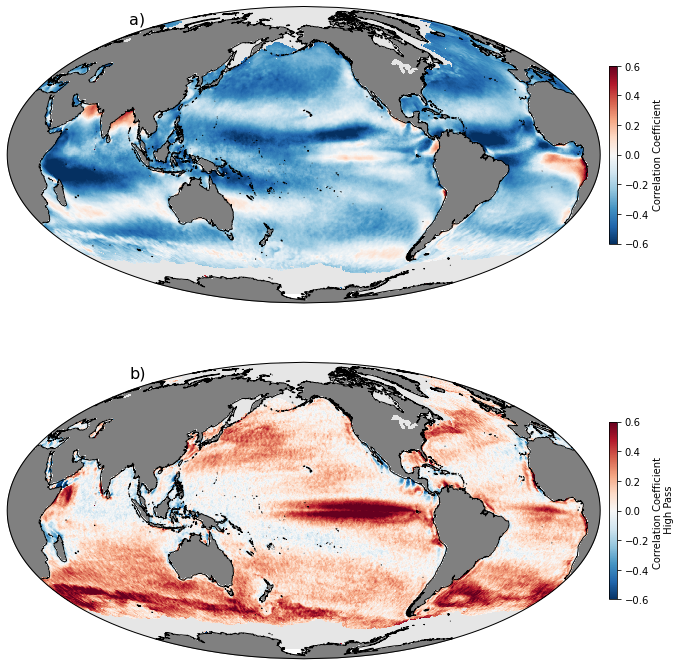

In [13]:
cmt='RdBu_r'
lnd,tlnd=['grey'],['grey']
vv=.6
tem=xr.concat([ds2.sel(lon=slice(20,360)),ds2.sel(lon=slice(0,20))],dim='lon')
fig = plt.figure(figsize=(15, 12))
ax = plt.subplot(211,projection=ccrs.Mollweide(central_longitude=-160))
if lnd=='natural':
    ax.stock_img()
else: 
    ax.add_feature(cfeature.LAND,facecolor=lnd)
#ax.stock_img()
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem.lon,tem.lat,tem.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap=cmt,transform=ccrs.PlateCarree())
cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
cax.set_label('Correlation Coefficient')
axt = plt.axes((.4, .8, .01, .01))
axt.axis('off')
axt.text(-6,6,'a)',fontsize=16)

tem=xr.concat([ds1.sel(lon=slice(20,360)),ds1.sel(lon=slice(0,20))],dim='lon')
ax = plt.subplot(212,projection=ccrs.Mollweide(central_longitude=-160))
if lnd=='natural':
    ax.stock_img()
else: 
    ax.add_feature(cfeature.LAND,facecolor=lnd)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem.lon,tem.lat,tem.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap=cmt,transform=ccrs.PlateCarree())
#ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap=vik_map,transform=ccrs.PlateCarree())
cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
cax.set_label('Correlation Coefficient \n High Pass')
axt = plt.axes((.4, .53, .01, .01))
axt.axis('off')
axt.text(-6,-8,'b)',fontsize=16)

fig.savefig(adir_figs+'figure1.png')

# shift where lon split occurs

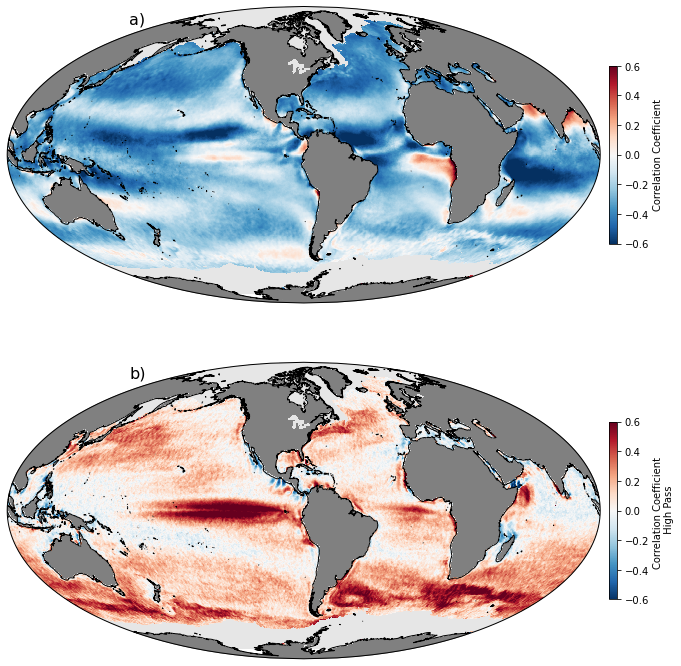

In [14]:
#make loop over different land types
#tlnd=['natural','white','grey']
cmt='RdBu_r'
tlnd=['grey']
for lnd in tlnd:
    vv=.6
    tem=xr.concat([ds2.sel(lon=slice(100,360)),ds2.sel(lon=slice(0,100))],dim='lon')
    fig = plt.figure(figsize=(15, 12))
    ax = plt.subplot(211,projection=ccrs.Mollweide(central_longitude=-80))
    if lnd=='natural':
        ax.stock_img()
    else: 
        ax.add_feature(cfeature.LAND,facecolor=lnd)
    #ax.stock_img()
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    ax0=ax.pcolormesh(tem.lon,tem.lat,tem.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
    ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap=cmt,transform=ccrs.PlateCarree())
    cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
    cax.set_label('Correlation Coefficient')
    axt = plt.axes((.4, .8, .01, .01))
    axt.axis('off')
    axt.text(-6,6,'a)',fontsize=16)

    tem=xr.concat([ds1.sel(lon=slice(100,360)),ds1.sel(lon=slice(0,100))],dim='lon')
    ax = plt.subplot(212,projection=ccrs.Mollweide(central_longitude=-80))
    if lnd=='natural':
        ax.stock_img()
    else: 
        ax.add_feature(cfeature.LAND,facecolor=lnd)
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    ax0=ax.pcolormesh(tem.lon,tem.lat,tem.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
    ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap=cmt,transform=ccrs.PlateCarree())
    #ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap=vik_map,transform=ccrs.PlateCarree())
    cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
    cax.set_label('Correlation Coefficient \n High Pass')
    axt = plt.axes((.4, .53, .01, .01))
    axt.axis('off')
    axt.text(-6,-8,'b)',fontsize=16)
    fig.savefig(adir_figs+'figure1a.png')

# split by season

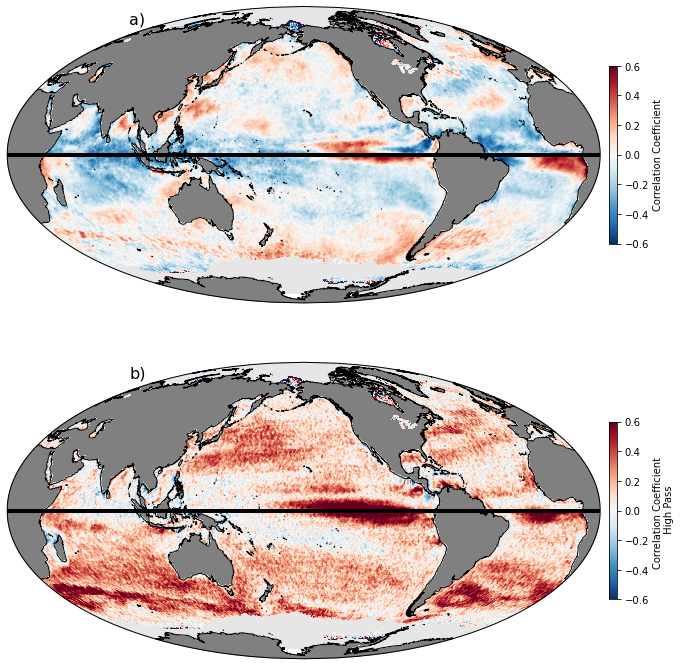

In [182]:
cmt='RdBu_r'
lnd,tlnd=['grey'],['grey']
vv=.6
tem=xr.concat([ds2_winter.sel(lon=slice(20,360)),ds2_winter.sel(lon=slice(0,20))],dim='lon')
fig = plt.figure(figsize=(15, 12))
ax = plt.subplot(211,projection=ccrs.Mollweide(central_longitude=-160))
if lnd=='natural':
    ax.stock_img()
else: 
    ax.add_feature(cfeature.LAND,facecolor=lnd)
#ax.stock_img()
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem.lon,tem.lat,tem.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrF,vmin=-vv,vmax=vv,cmap=cmt,transform=ccrs.PlateCarree())
ax2=ax.plot([20,380],[0,0],'k',linewidth=4,transform=ccrs.PlateCarree())
cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
cax.set_label('Correlation Coefficient')
axt = plt.axes((.4, .8, .01, .01))
axt.axis('off')
axt.text(-6,6,'a)',fontsize=16)

tem=xr.concat([ds1_winter.sel(lon=slice(20,360)),ds1_winter.sel(lon=slice(0,20))],dim='lon')
ax = plt.subplot(212,projection=ccrs.Mollweide(central_longitude=-160))
if lnd=='natural':
    ax.stock_img()
else: 
    ax.add_feature(cfeature.LAND,facecolor=lnd)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem.lon,tem.lat,tem.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap=cmt,transform=ccrs.PlateCarree())
ax2=ax.plot([20,380],[0,0],'k',linewidth=4,transform=ccrs.PlateCarree())
#ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap=vik_map,transform=ccrs.PlateCarree())
cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
cax.set_label('Correlation Coefficient \n High Pass')
axt = plt.axes((.4, .53, .01, .01))
axt.axis('off')
axt.text(-6,-8,'b)',fontsize=16)

fig.savefig(adir_figs+'figure1_winter.png')

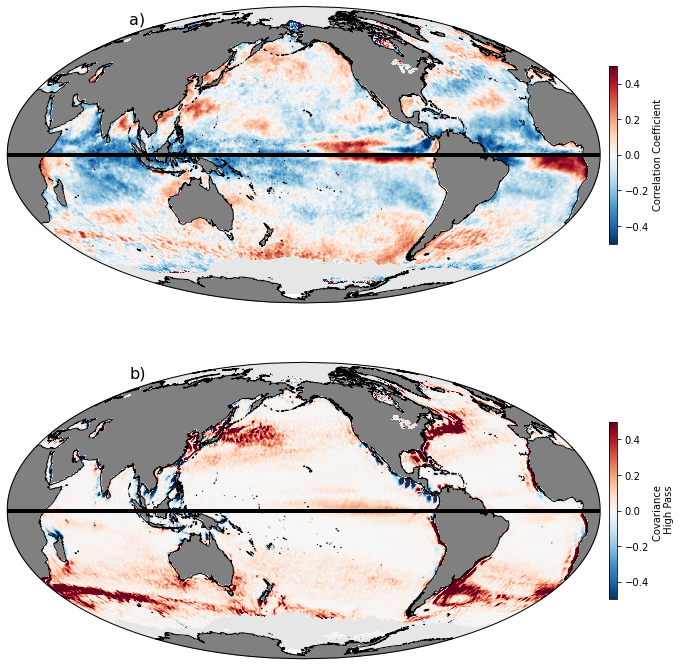

In [184]:
cmt='RdBu_r'
lnd,tlnd=['grey'],['grey']
vv=.5
tem=xr.concat([ds2_winter.sel(lon=slice(20,360)),ds2_winter.sel(lon=slice(0,20))],dim='lon')
tem2=tem.copy(deep=True)
fig = plt.figure(figsize=(15, 12))
ax = plt.subplot(211,projection=ccrs.Mollweide(central_longitude=-160))
if lnd=='natural':
    ax.stock_img()
else: 
    ax.add_feature(cfeature.LAND,facecolor=lnd)
#ax.stock_img()
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem.lon,tem.lat,tem.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrF,vmin=-vv,vmax=vv,cmap=cmt,transform=ccrs.PlateCarree())
ax2=ax.plot([20,380],[0,0],'k',linewidth=4,transform=ccrs.PlateCarree())
cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
cax.set_label('Correlation Coefficient')
axt = plt.axes((.4, .8, .01, .01))
axt.axis('off')
axt.text(-6,6,'a)',fontsize=16)

tem=xr.concat([ds1_cov_winter.sel(lon=slice(20,360)),ds1_cov_winter.sel(lon=slice(0,20))],dim='lon')
ax = plt.subplot(212,projection=ccrs.Mollweide(central_longitude=-160))
if lnd=='natural':
    ax.stock_img()
else: 
    ax.add_feature(cfeature.LAND,facecolor=lnd)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem2.lon,tem2.lat,tem2.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.covH,vmin=-vv,vmax=vv,cmap=cmt,transform=ccrs.PlateCarree())
ax2=ax.plot([20,380],[0,0],'k',linewidth=4,transform=ccrs.PlateCarree())
#ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap=vik_map,transform=ccrs.PlateCarree())
cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
cax.set_label('Covariance \n High Pass')
axt = plt.axes((.4, .53, .01, .01))
axt.axis('off')
axt.text(-6,-8,'b)',fontsize=16)

fig.savefig(adir_figs+'figure1_cov_winter.png')

# Figure 2

In [22]:
tem = loadmat(adir_data+'Clayson_fluxDifferences.mat')
ds_err = xr.Dataset({'err_year': (['lat', 'lon'],  tem['combinedSD'].transpose()),
                    'err_DJF': (['lat', 'lon'],  tem['combinedSDdjf'].transpose()),
                    'err_JJA': (['lat', 'lon'],  tem['combinedSDjja'].transpose())},
                      coords={'lon': (['lon'], tem['longitude'][:,0]),
                              'lat': (['lat'], tem['latitude'][:,0])})

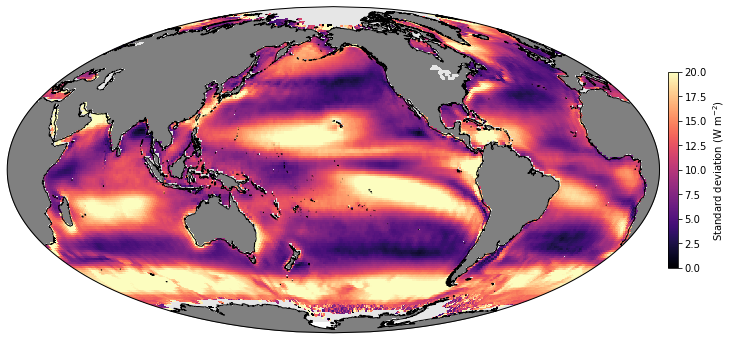

In [186]:
cmt='magma'
#tlnd=['natural','white','grey']
tlnd=['grey']
vv=.75
fig = plt.figure(figsize=(15, 6))
#read in Fig 1 data for masking Figure 2 data
tem1=xr.concat([ds1.sel(lon=slice(20,360)),ds1.sel(lon=slice(0,20))],dim='lon')
tem=xr.concat([ds_err.sel(lon=slice(20,360)),ds_err.sel(lon=slice(0,20))],dim='lon')
ax = plt.subplot(111,projection=ccrs.Mollweide(central_longitude=-160))
if lnd=='natural':
    ax.stock_img()
else: 
    ax.add_feature(cfeature.LAND,facecolor=lnd)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem1.lon,tem1.lat,tem1.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.err_year,vmin=0,vmax=20,cmap=cmt,transform=ccrs.PlateCarree())
cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
cax.set_label('Standard deviation (W m$^{-2}$)')
axt = plt.axes((.4, .26, .01, .01))
axt.axis('off')
#axt.text(0,1.2,'c)',fontsize=16)
fig.savefig(adir_figs+'figure2.png')

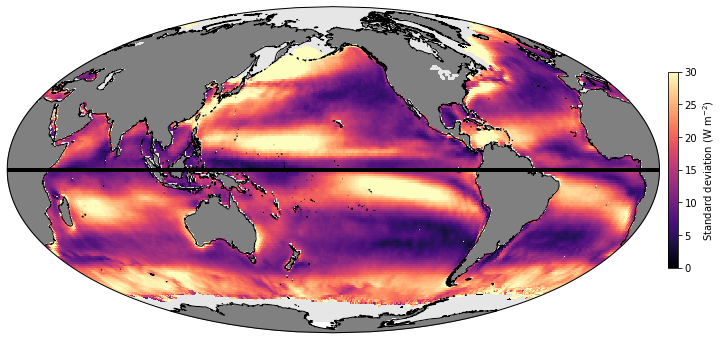

In [93]:
cmt='magma'
#tlnd=['natural','white','grey']
tlnd=['grey']
vv=.75
fig = plt.figure(figsize=(15, 6))
#read in Fig 1 data for masking Figure 2 data
tem1=xr.concat([ds1.sel(lon=slice(20,360)),ds1.sel(lon=slice(0,20))],dim='lon')
tem=xr.concat([ds_err.sel(lon=slice(20,360)),ds_err.sel(lon=slice(0,20))],dim='lon')
#create data with Nhemisphere winter & Shemisphere winter
tem['winter']=xr.concat([tem.err_DJF.sel(lat=slice(0,90)),tem.err_JJA.sel(lat=slice(-90,0))],dim='lat')
ax = plt.subplot(111,projection=ccrs.Mollweide(central_longitude=-160))
ax.add_feature(cfeature.LAND,facecolor=lnd)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem1.lon,tem1.lat,tem1.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.winter,vmin=0,vmax=30,cmap=cmt,transform=ccrs.PlateCarree())
ax2=ax.plot([20,380],[0,0],'k',linewidth=4,transform=ccrs.PlateCarree())
cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
cax.set_label('Standard deviation (W m$^{-2}$)')
axt = plt.axes((.4, .26, .01, .01))
axt.axis('off')
fig.savefig(adir_figs+'figure2_winter.png')


# Figure 3 data from clayson

In [38]:
file = adir_data+'chelle.mat'
data = loadmat(file)
time = data['satTimes']
sat_lh = data['satLValues']
sat_wnd = data['satWValues']
sat_qs = data['satQsqaValues']
ship_time = data['ship_date']
ship_lh = data['ship_lhf']

xtime = data['ship_date']
xlon = data['ship_lon']
xlat = data['ship_lat']
dkm = np.abs((((xlon-xlon[0])**2+(xlat-xlat[0])**2)**.5)*111*np.cos(np.pi*xlat[0]/180))
ilen = dkm.size
ind=(ilen-1)*np.arange(0,1.2,.2)
xstr=[]
for ii in ind:
    tem = dkm.item(int(ii))
    xstr.append("%.0f" % tem)
xstr

tem=[]
for i in range(ship_time.size):
    tt = data['ship_date'][i]
    dd= int(np.floor(tt))
    hh = int(np.floor(  (tt - dd) * 24 ))
    mm = int(np.floor ( (((tt - dd) * 24 ) - hh) * 60 ))
    tem0=np.datetime64('0000-01-01')+np.timedelta64(dd,'D')+np.timedelta64(hh,'h')+np.timedelta64(mm,'m')
    tem.append(tem0)
ship_date = tem

tem=[]
for i in range(sat_lh.size):
    tt = data['satTimes'][0,i]
    dd= int(np.floor(tt))
    hh = int(np.floor(  (tt - dd) * 24 ))
    mm = int(np.floor ( (((tt - dd) * 24 ) - hh) * 60 ))
    tem0=np.datetime64('0000-01-01')+np.timedelta64(dd,'D')+np.timedelta64(hh,'h')+np.timedelta64(mm,'m')
    tem.append(tem0)
sat_date = tem


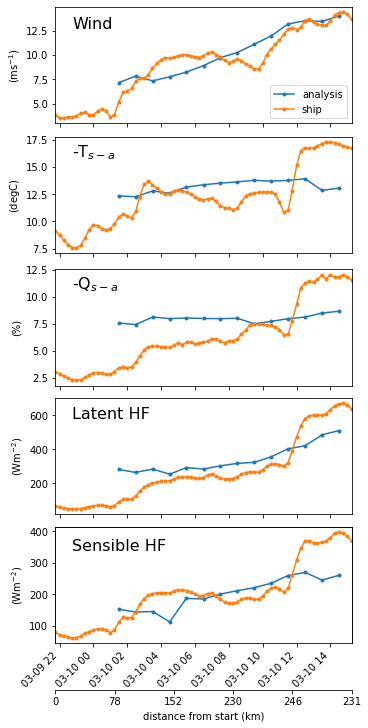

In [165]:
fig, axes = plt.subplots(ncols=1, nrows=5, constrained_layout=True,figsize=(5, 10))
for i in range(5):
    x1,x2=sat_date,ship_date #data['satTimes'][0,:],data['ship_date']
    if i==1:
#        y1,y2=data['satSstValues'][0,:]-data['satTstaValues'][0,:],data['ship_sst']-data['ship_tsta']
        y1,y2=data['satTstaValues'][0,:],data['ship_tsta']
        ax = axes[i] 
        ylab,ystr='($\deg$C)','-T$_{s-a}$'
    if i==0:
        y1,y2=data['satWValues'][0,:],data['ship_wspd']
        ax=axes[i]
        ylab,ystr='(ms$^{-1}$)','Wind'
    if i==2:
        y1,y2=data['satQsqaValues'][0,:],data['ship_qsqa'][0,:]
        ax=axes[i]
        ylab,ystr='(%)','-Q$_{s-a}$'
    if i==3:
        y1,y2=data['satLValues'][0,:],data['ship_lhf']
        ax=axes[i]
        ylab,ystr='(Wm$^{-2}$)','Latent HF'
    if i==4:
        y1,y2=data['satShfValues'][0,:],data['ship_shf']
        ax=axes[i]
        ylab,ystr='(Wm$^{-2}$)','Sensible HF'
        
    ax.plot(x1,y1,'.-',label='analysis')
    ax.plot(x2,y2,'.-',label='ship')
    ax.text(x2[0]+np.timedelta64(1,'h'),y2[-1]-.1*(y2[-1]-y2[0]),ystr,size=16)
    ax.set_xlim(x2[0],x2[-1])
    ax.set_ylabel(ylab)
    if i==0:
        ax.legend(loc='lower right')
    #ax.set_xticks(rotation=70)
    plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
    if i<4:
        labels = [item.get_text() for item in ax.get_xticklabels()]
        empty_string_labels = ['']*len(labels)
        ax.set_xticklabels(empty_string_labels)
    else:
        ax2 = ax.twiny()
        # Add some extra space for the second axis at the bottom
        #fig.subplots_adjust(bottom=0.2)
        # Move twinned axis ticks and label from top to bottom
        ax2.xaxis.set_ticks_position("bottom")
        ax2.xaxis.set_label_position("bottom")
        # Offset the twin axis below the host
        ax2.spines["bottom"].set_position(("axes", -0.4))
        ax1Ticks = ax.get_xticks()   
        ax2Ticks = ax1Ticks
        new_tick_locations = np.array([0,.2,.4,.6,.8,1])
        ax2.set_xticks(new_tick_locations)
        ax2.set_xticklabels(xstr)
        ax2.set_xlabel('distance from start (km)')
        
fig.savefig(adir_figs+'figure3a.png')


In [43]:
import sys
sys.path.append('./../../flux/')
from coare3 import coare3


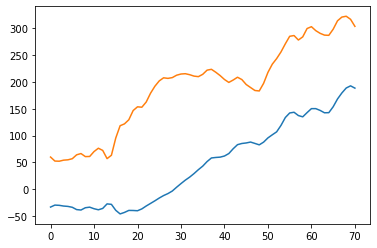

In [59]:
relative_humidity = (100-data['ship_qsqa'])      #N/A    near surface relative humidity
air_temperature = data['ship_tsta']
air_pressure = 1013

qa = 0.00942            #kg/kg  near surface water vapor mixing ratio   
qs = 0.01178            #kg/kg  derived saturation mixing ratio

es = 6.1121*np.exp(17.502*air_temperature/(air_temperature+240.97))*(1.0007+3.46e-6*air_pressure)
beta = relative_humidity*es/100.
spec_hum =( 0.622*beta ) / (air_pressure - 0.378*beta)

#num = 17.67*(Tsea - 273.15 + dTsea) 
#dem = (Tsea - 273.15 + 243.5 + dTsea) 
#dqs_computed  = (6.112*np.exp(num/dem)) / pres*0.622 - qs

inputs = {'u':data['ship_wspd']*1.94,
          't':data['ship_tsta'],
          'rh':spec_hum,
          'ts':data['ship_sst'],
          'lat':data['ship_lat']}
#print(inputs)
res = coare3(inputs)
#print(res['hsb'],res['hlb'])
#inputs['u']=wind+dwind
#abs(res['hsb']-res2['hsb'])
#dif2a = abs(res['hlb']-res2['hlb'])
plt.plot(res['hsb'])
plt.plot(res['hlb'])

# Figure 4

In [ ]:
#where to find the data
adir= 'F:/data/fluxsat/wrf_data/'

#read in the data
ds1=xr.open_dataset(adir+'lhsh_gradient_05deg.nc')
ds1.coords['lon'] = (ds1.coords['lon'] + 180) % 360 - 180
ds1.close()
ds2=xr.open_dataset(adir+'lhsh_gradient_0125deg.nc') #Full: corelation using unfiltered daily data: 
ds2.coords['lon'] = (ds2.coords['lon'] + 180) % 360 - 180
ds2.close()
ds3=xr.open_dataset(adir+'standard_dev_05deg.nc') #Full: corelation using unfiltered daily data: 
ds3.coords['lon'] = (ds3.coords['lon'] + 180) % 360 - 180
#ds3 = ds3.sortby('lon')
ds3.close()
#ds3

#tony new
ds4=xr.open_dataset(adir+'meansdrmsd_lhsh_gradient_0125deg.nc') #Full: corelation using unfiltered daily data: 
ds4.coords['lon'] = (ds4.coords['lon'] + 180) % 360 - 180
ds4.close()
ds5=xr.open_dataset(adir+'meansdrmsd_lhsh_gradient_05deg.nc') #Full: corelation using unfiltered daily data: 
ds5.coords['lon'] = (ds5.coords['lon'] + 180) % 360 - 180
ds5.close()


ds4

In [ ]:
ds4.time_mean_lh_gradient

In [ ]:
cmt,cm='magma','magma'
proj = ccrs.PlateCarree(central_longitude=-160)
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True,subplot_kw=dict(projection=proj),figsize=(10, 6))
for i in range(4):
    if i==0:
        tem=ds4.time_mean_lh_gradient
        vv0,vv=0,2#1.5
        ax = axes[0,0] 
    if i==1:
        tem=ds4.time_mean_sh_gradient
        vv0,vv=0,1#.5
        ax=axes[0,1]
    if i==2:
        tem=ds4.rmsd_lh_gradient_noshift_3hrforward
        vv0,vv=0,2#1.5
        ax=axes[1,0]
    if i==3:
        tem=ds4.rmsd_sh_gradient_noshift_3hrforward
        vv0,vv=0,1#.5
        ax=axes[1,1]
        
    tem=tem.where(tem!=-9999).sel(lon=slice(-75,-35),lat=slice(32,52))
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    ax1=ax.pcolormesh(tem.lon,tem.lat,tem*100,vmin=vv0,vmax=100*vv,cmap=cm,transform=ccrs.PlateCarree())
    ax.set_extent([-75,-35,32,51])
    bx1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='grey', alpha=0.5, linestyle='--')
    bx1.xlabels_top = False; bx1.ylabels_left = True
    bx1.ylabels_right = False; bx1.xlines = False
    bx1.xlocator = mticker.FixedLocator([-75,-65,-55,-45,-35])
    bx1.xformatter = LONGITUDE_FORMATTER; bx1.yformatter = LATITUDE_FORMATTER

    if i>1:
        # create color bar
        box = ax.get_position()
        axColor = plt.axes([box.x0, box.y0 - 0.06, box.width, 0.02])
        plt.colorbar(ax1, cax = axColor, orientation="horizontal")
        plt.xlabel('(W m$^{-2}$ 100 km$^{-1}$)')
        
axt = plt.axes((.5, .5, .01, .01))
axt.axis('off')
axt.text(-35,38,'a)LH flux gradient mean ',fontsize=14)
axt.text(7,38,'b)SH flux gradient mean',fontsize=14)
axt.text(-35,-3.5,'c)LH flux gradient RMSD diff',fontsize=14)
axt.text(7,-3.5,'d)SH flux gradient RMSD diff',fontsize=14)

fout=adir+'figure4'+cmt+'.png'
print(fout)
fig.savefig(fout)


# Figure 5

In [ ]:
#cmt,cm='viridis','viridis'
cmt,cm='magma','magma'
#cmt,cm='inferno','inferno'
#cmt,cm='plasma','plasma'
#cmt,cm='vik',vik_map
#cmt,cm='seismic','seismic'
proj = ccrs.PlateCarree(central_longitude=-160)
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True,subplot_kw=dict(projection=proj),figsize=(10, 6))
for i in range(4):
    if i==0:
        tem=ds2.lh_gradient_0125deg
        vv=2 #2.8
        ax = axes[0,0] 
    if i==1:
        tem=ds2.sh_gradient_0125deg
        vv=1 #.5 #1.40
        ax=axes[0,1]
    if i==2:
        tem=ds1.lh_gradient_05deg
        vv=2 #2.80
        ax=axes[1,0]
    if i==3:
        tem=ds1.sh_gradient_05deg
        vv=1 #.5 #1.40
        ax=axes[1,1]
        
    tem=tem.where(tem!=-9999).sel(lon=slice(-75,-35),lat=slice(32,52))
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    ax1=ax.pcolormesh(tem.lon,tem.lat,tem*100,vmin=0,vmax=100*vv,cmap=cm,transform=ccrs.PlateCarree())
    ax.set_extent([-75,-35,32,51])
    bx1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='grey', alpha=0.5, linestyle='--')
    bx1.xlabels_top = False; bx1.ylabels_left = True
    bx1.ylabels_right = False; bx1.xlines = False
    bx1.xlocator = mticker.FixedLocator([-75,-65,-55,-45,-35])
    bx1.xformatter = LONGITUDE_FORMATTER; bx1.yformatter = LATITUDE_FORMATTER
    if i>1:
        # create color bar
        box = ax.get_position()
        axColor = plt.axes([box.x0, box.y0 - 0.06, box.width, 0.02])
        plt.colorbar(ax1, cax = axColor, orientation="horizontal")
        plt.xlabel('(W m$^{-2}$ 100 km$^{-1}$)')

axt = plt.axes((.5, .5, .01, .01))
axt.axis('off')
axt.text(-35,38,'a)LH flux 0.125 deg ',fontsize=16)
axt.text(7,38,'b)SH flux 0.125 deg',fontsize=16)
axt.text(-35,-3.5,'c)LH flux 0.5 deg',fontsize=16)
axt.text(7,-3.5,'d)SH flux 0.5 deg',fontsize=16)

fig.savefig(adir+'figure5'+cmt+'.png')


# 4-panel no sensible

In [ ]:
plt.plot(data['satSstValues'][0,:])
plt.plot(data['ship_sst'])
plt.plot(data['satTstaValues'][0,:])
plt.plot(data['ship_tsta'])

# reading text files from Tony

In [ ]:
file='F:/data/fluxsat/wrf_data/sdmeanrmsd_3hr_backward_05deg.txt'
token = open(file,'r')
linestoken=token.readlines()
tokens_column_number = 1
resulttoken=[]
for x in linestoken:
    resulttoken.append(x.split()[tokens_column_number])
token.close()
lat=resulttoken[1:]
tokens_column_number = 0
resulttoken=[]
for x in linestoken:
    resulttoken.append(x.split()[tokens_column_number])
token.close()
lon=resulttoken[1:]
tokens_column_number = 2
resulttoken=[]
for x in linestoken:
    resulttoken.append(x.split()[tokens_column_number])
token.close()
dLHstddev=resulttoken[1:]
tokens_column_number = 3
resulttoken=[]
for x in linestoken:
    resulttoken.append(x.split()[tokens_column_number])
token.close()
dLHmean=resulttoken[1:]
tokens_column_number = 4
resulttoken=[]
for x in linestoken:
    resulttoken.append(x.split()[tokens_column_number])
token.close()
dLHrmsd=resulttoken[1:]


adir= 'F:/data/fluxsat/wrf_data/'

#read in the data
ds1=xr.open_dataset(adir+'lhsh_gradient_05deg.nc')
ds1.coords['lon'] = (ds1.coords['lon'] + 180) % 360 - 180
ds1.close()
ds2=xr.open_dataset(adir+'lhsh_gradient_0125deg.nc') #Full: corelation using unfiltered daily data: 
ds2.coords['lon'] = (ds2.coords['lon'] + 180) % 360 - 180
ds2.close()
ds3=xr.open_dataset(adir+'standard_dev_05deg.nc') #Full: corelation using unfiltered daily data: 
ds3.coords['lon'] = (ds3.coords['lon'] + 180) % 360 - 180
#ds3 = ds3.sortby('lon')
ds3.close()

tem=np.empty((ds3.sd_dlh_05deg_wind_3hrs_forward.lat.size,ds3.sd_dlh_05deg_wind_3hrs_forward.lon.size))
for i in range(len(lat)):
    ii=int(np.round((float(lat[i])-32)/.5))
    jj=int(np.round((float(lon[i])-276)/.5))
    tem[ii,jj]=dLHmean[i]
tem[tem==-9999]=np.nan
ds3['dLHmean']=xr.DataArray(tem,coords=[ds3.lat,ds3.lon], dims=['lat', 'lon'])

tem=np.empty((ds3.sd_dlh_05deg_wind_3hrs_forward.lat.size,ds3.sd_dlh_05deg_wind_3hrs_forward.lon.size))
for i in range(len(lat)):
    ii=int(np.round((float(lat[i])-32)/.5))
    jj=int(np.round((float(lon[i])-276)/.5))
    tem[ii,jj]=dLHstddev[i]
tem[tem==-9999]=np.nan
ds3['dLHstddev']=xr.DataArray(tem,coords=[ds3.lat,ds3.lon], dims=['lat', 'lon'])

tem=np.empty((ds3.sd_dlh_05deg_wind_3hrs_forward.lat.size,ds3.sd_dlh_05deg_wind_3hrs_forward.lon.size))
for i in range(len(lat)):
    ii=int(np.round((float(lat[i])-32)/.5))
    jj=int(np.round((float(lon[i])-276)/.5))
    tem[ii,jj]=dLHrmsd[i]
tem[tem==-9999]=np.nan
ds3['dLHrmsd']=xr.DataArray(tem,coords=[ds3.lat,ds3.lon], dims=['lat', 'lon'])



In [ ]:
cmt,cm='plasma','plasma'
proj = ccrs.PlateCarree(central_longitude=-160)
fig, axes = plt.subplots(ncols=1, nrows=3, constrained_layout=True,subplot_kw=dict(projection=proj),figsize=(6, 6))
for i in range(4):
    if i==0:
        tem=ds3.dLHmean
        vv0,vv=-2,2
        ax = axes[0] 
    if i==1:
        tem=ds3.dLHstddev
        vv0,vv=0,50
        ax=axes[1]
    if i==2:
        tem=ds3.dLHrmsd
        vv0,vv=0,50
        ax=axes[2]
        
    tem=tem.where(tem!=-9999).sel(lon=slice(-75,-35),lat=slice(32,52))
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    ax1=ax.pcolormesh(tem.lon,tem.lat,tem,vmin=vv0,vmax=vv,cmap=cm,transform=ccrs.PlateCarree())
    ax.set_extent([-75,-35,32,51])
    bx1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='gray', alpha=0.5, linestyle='--')
    bx1.xlabels_top = False; bx1.ylabels_left = True
    bx1.ylabels_right = False; bx1.xlines = False
    bx1.xlocator = mticker.FixedLocator([-75,-65,-55,-45,-35])
    bx1.xformatter = LONGITUDE_FORMATTER; bx1.yformatter = LATITUDE_FORMATTER
    cax=plt.colorbar(ax1,ax=ax, shrink=1, pad=0.01, fraction=.02)
    cax.set_label('(W m$^{-2}$)')

axt = plt.axes((.5, .5, .01, .01))
axt.axis('off')
axt.text(-20,49.5,'a)LH Mean flux',fontsize=16)
axt.text(-20,15.9,'b)LH STD flux',fontsize=16)
axt.text(-20,-18,'c)LH RMSD flux',fontsize=16)

fig.savefig(adir+'figure3_test'+cmt+'.png')

In [ ]:
#ds4.time_mean_lh_gradient.plot(vmin=0,vmax=2)
ds4.rmsd_lh_gradient_noshift_3hrforward.plot(vmin=-1.25,vmax=1.25,cmap='plasma')
#ds4

In [ ]:
cmt,cm='plasma','plasma'
proj = ccrs.PlateCarree(central_longitude=-160)
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True,subplot_kw=dict(projection=proj),figsize=(12, 6))
for i in range(4):
    if i==0:
        tem=ds3.sd_lh_05deg
        vv=180
        ax = axes[0,0] 
    if i==1:
        tem=ds3.sd_sh_05deg
        vv=80
        ax=axes[0,1]
    if i==2:
        tem=ds3.sd_dlh_05deg_wind_3hrs_forward
        vv=65
        ax=axes[1,0]
    if i==3:
        tem=ds3.sd_dsh_05deg_wind_3hrs_forward
        vv=80
        ax=axes[1,1]
        
    tem=tem.where(tem!=-9999).sel(lon=slice(-75,-35),lat=slice(32,52))
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    ax1=ax.pcolormesh(tem.lon,tem.lat,tem,vmin=0,vmax=vv,cmap=cm,transform=ccrs.PlateCarree())
    ax.set_extent([-75,-35,32,51])
    bx1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='gray', alpha=0.5, linestyle='--')
    bx1.xlabels_top = False; bx1.ylabels_left = True
    bx1.ylabels_right = False; bx1.xlines = False
    bx1.xlocator = mticker.FixedLocator([-75,-65,-55,-45,-35])
    bx1.xformatter = LONGITUDE_FORMATTER; bx1.yformatter = LATITUDE_FORMATTER
    cax=plt.colorbar(ax1,ax=ax, shrink=1, pad=0.01, fraction=.02)
    cax.set_label('STD (W m$^{-2}$)')

axt = plt.axes((.5, .5, .01, .01))
axt.axis('off')
axt.text(-30,39,'a)LH flux',fontsize=16)
axt.text(15,39,'b)SH flux',fontsize=16)
axt.text(-30,-2.5,'c)LH flux 3hr diff',fontsize=16)
axt.text(15,-2.5,'d)SH flux 3hr diff',fontsize=16)

fig.savefig(adir+'figure3'+cmt+'.png')

# TESTING INDIVIDUAL FIGURES

In [ ]:
tem1=xr.concat([ds1.sel(lon=slice(20,360)),ds1.sel(lon=slice(0,20))],dim='lon')
tem=xr.concat([ds_err.sel(lon=slice(20,360)),ds_err.sel(lon=slice(0,20))],dim='lon')
fig = plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-160))
ax.stock_img()
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem1.lon,tem1.lat,tem1.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.err,vmin=0,vmax=30,cmap=roma_map2,transform=ccrs.PlateCarree())
cax=plt.colorbar(ax1,ax=ax, shrink=.6)
cax.set_label('Standard deviation (W m$^{-2}$)')
axt = plt.axes((.3, .8, .01, .01))
axt.axis('off')
axt.text(0,1.2,'b)',fontsize=16)
fig.savefig(adir+'err.png')

In [ ]:
#old figure 3
#cmt,cm='viridis','viridis'
#cmt,cm='magma','magma'
#cmt,cm='inferno','inferno'
cmt,cm='plasma','plasma'
proj = ccrs.PlateCarree(central_longitude=-160)
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True,subplot_kw=dict(projection=proj),figsize=(12, 6))
for i in range(4):
    if i==0:
        tem=ds3.sd_lh_05deg
        vv=180
        ax = axes[0,0] 
    if i==1:
        tem=ds3.sd_sh_05deg
        vv=80
        ax=axes[0,1]
    if i==2:
        tem=ds3.sd_dlh_05deg_wind_3hrs_forward
        vv=65
        ax=axes[1,0]
    if i==3:
        tem=ds3.sd_dsh_05deg_wind_3hrs_forward
        vv=80
        ax=axes[1,1]
        
    tem=tem.where(tem!=-9999).sel(lon=slice(-75,-35),lat=slice(32,52))
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    ax1=ax.pcolormesh(tem.lon,tem.lat,tem,vmin=0,vmax=vv,cmap=cm,transform=ccrs.PlateCarree())
    ax.set_extent([-75,-35,32,51])
    bx1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='gray', alpha=0.5, linestyle='--')
    bx1.xlabels_top = False; bx1.ylabels_left = True
    bx1.ylabels_right = False; bx1.xlines = False
    bx1.xlocator = mticker.FixedLocator([-75,-65,-55,-45,-35])
    bx1.xformatter = LONGITUDE_FORMATTER; bx1.yformatter = LATITUDE_FORMATTER
    cax=plt.colorbar(ax1,ax=ax, shrink=1, pad=0.01, fraction=.02)
    cax.set_label('STD (W m$^{-2}$)')

axt = plt.axes((.5, .5, .01, .01))
axt.axis('off')
axt.text(-30,39,'a)LH flux',fontsize=16)
axt.text(15,39,'b)SH flux',fontsize=16)
axt.text(-30,-2.5,'c)LH flux 3hr diff',fontsize=16)
axt.text(15,-2.5,'d)SH flux 3hr diff',fontsize=16)

fig.savefig(adir+'figure3'+cmt+'.png')

In [ ]:
file = 'f:/data/cruise_data/saildrone/2019_atlantic/saildrone-gen_5-1021_atlantic-sd1021-20190525T000000-20191021T235959-1_minutes-v1.1571806429446.nc'
ds = xr.open_dataset(file)
ds

In [ ]:
ds.TEMP_AIR_MEAN.plot()
ds.TEMP_CTD_RBR_MEAN.plot()

In [ ]:
plt.plot(ds.longitude[0,:],ds.latitude[0,:])#,c=ds.TEMP_CTD_RBR_MEAN[0,:])